# File and libraries

In [71]:
import pandas as pd
import numpy as np


filepath=r'data/df_merch_7_bal_input'
test_filepath= f"{filepath}_test.csv"
train_filepath= f"{filepath}_train.csv"

file_tag = "Google Merch Shop"

# DSLabs functions

In [72]:
%run "scripts/dslabs_functions.py"


# Data functions

In [73]:
%run "scripts/data_functions.py"


data_functions lodaded


# Load

In [74]:
# test_data=True
test_data=False

# use to evaluate strategies. otherwise False to just transform data 
evaluate=True
# evaluate=False

if test_data==True:

    data=pd.read_csv(f"{filepath}.csv")
    
    test= pd.read_csv(test_filepath)
    train= pd.read_csv(train_filepath)

    # sample to test setup
    data = data.groupby('day_of_year').apply(lambda x: sample_per_day(x, 0.01)).reset_index(drop=True)
    test = test.groupby('day_of_year').apply(lambda x: sample_per_day(x, 0.01)).reset_index(drop=True)
    train = train.groupby('day_of_year').apply(lambda x: sample_per_day(x, 0.01)).reset_index(drop=True)

    
    
else:
    data=pd.read_csv(f"{filepath}.csv")  
    test= pd.read_csv(test_filepath)
    train= pd.read_csv(train_filepath)

    # use 10% sample file when heavy processing
    # data=pd.read_csv(sample_filepath)
    # test= pd.read_csv(test_sample_filepath)
    # test= pd.read_csv(train_sample_filepath)
 
target='returning_user'
target_metric='f2'
vars: list[str] = data.columns.to_list()
labels: list = list(data[target].unique())


# ensure sorting by day_of_year for correct splitting 
# "When in the presence of temporal data, data partition shall use older data to train and newer to test, in order to not use future data to classify past data. In any other case, partition shall be random."
data.sort_values(by='day_of_year', inplace=True)
test.sort_values(by='day_of_year', inplace=True)
train.sort_values(by='day_of_year', inplace=True)



data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 363410 entries, 0 to 363409
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   event_name             363410 non-null  float64
 1   device_language        363410 non-null  float64
 2   geo_region             363410 non-null  float64
 3   geo_city               363410 non-null  float64
 4   traffic_source_medium  363410 non-null  float64
 5   traffic_source_source  363410 non-null  float64
 6   engagement_time_msec   363410 non-null  float64
 7   day_of_year            363410 non-null  float64
 8   page_path_level_1      363410 non-null  float64
 9   path_length            363410 non-null  float64
 10  local_minute_sin       363410 non-null  float64
 11  local_minute_cos       363410 non-null  float64
 12  geo_country            363410 non-null  float64
 13  session_engaged        363410 non-null  float64
 14  is_weekend             363410 non-null  f

# Distribution Check

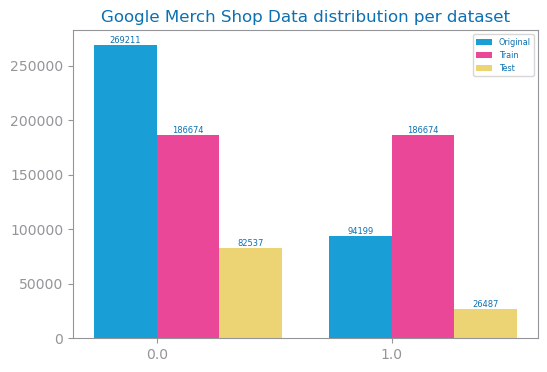

In [75]:
from pandas import concat
from matplotlib.pyplot import figure, show
from dslabs_functions import plot_multibar_chart


# Distribution check


# Create a dictionary to store original class counts
values: dict[str, list[int]] = {
    "Original": [
        len(data[data[target] == 0]),  # Assuming 0 is the negative class
        len(data[data[target] == 1]),  # Assuming 1 is the positive class
    ]
}

values["Train"] = [
    len(train[train[target] == 0]),
    len(train[train[target] == 1]),
]
values["Test"] = [
    len(test[test[target] == 0]),
    len(test[test[target] == 1]),
]

# Visualize the distribution
figure(figsize=(6, 4))
plot_multibar_chart(labels, values, title=f"{file_tag} Data distribution per dataset")
show()

# Model Prep

In [76]:
trnX, tstX, trnY, tstY, labels, vars = read_train_test_from_files(train, test, target)
print(f'Train#={len(trnX)} Test#={len(tstX)}')
print(f'Labels={labels}')

Train#=373348 Test#=109024
Labels=[0.0, 1.0]


## d max definition

In [77]:
d_max_eval=15

# recall

## recall study

 DT best with entropy and d=6


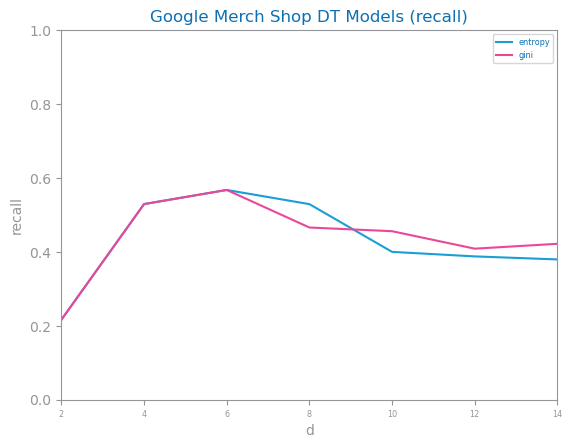

In [78]:
best_model_recall, recall_params = trees_study(trnX, trnY, tstX, tstY, d_max=d_max_eval, metric='recall', file_tag=file_tag)
savefig(f'images/{file_tag}_dt_recall_study.png')
show()

## model evaluation

<Figure size 640x480 with 0 Axes>

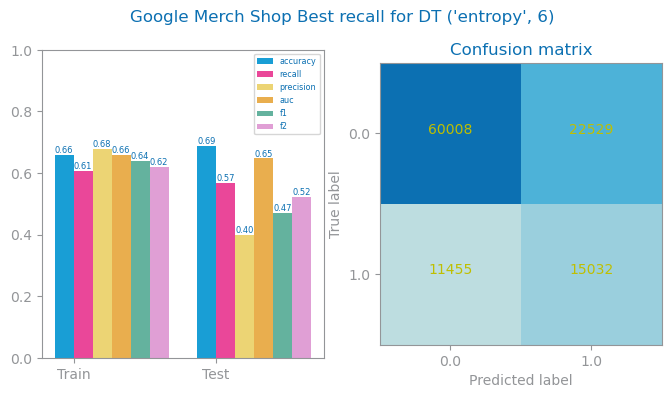

In [79]:
from dslabs_functions import plot_evaluation_results


prd_trn: array = best_model_recall.predict(trnX)
prd_tst: array = best_model_recall.predict(tstX)
figure()
plot_evaluation_results(recall_params, trnY, prd_trn, tstY, prd_tst, labels, file_tag=file_tag)
savefig(f'images/{file_tag}_knn_{recall_params["name"]}_best_{recall_params["metric"]}_eval.png')
show()

# precision

## precision study

 DT best with entropy and d=2


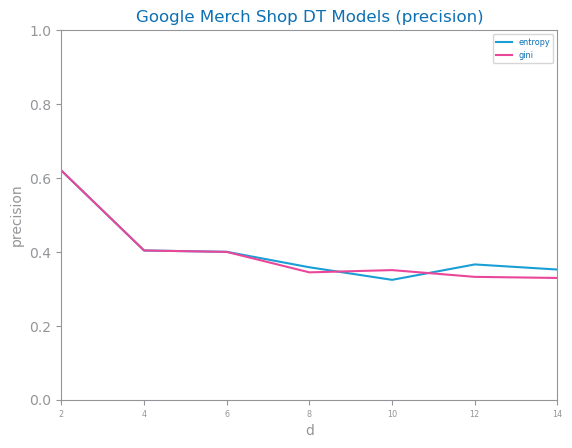

In [80]:
best_model_prec, prec_params = trees_study(trnX, trnY, tstX, tstY, d_max=d_max_eval, metric='precision', file_tag=file_tag)
savefig(f'images/{file_tag}_dt_{prec_params["metric"]}_study.png')
show()

## model evaluation

<Figure size 640x480 with 0 Axes>

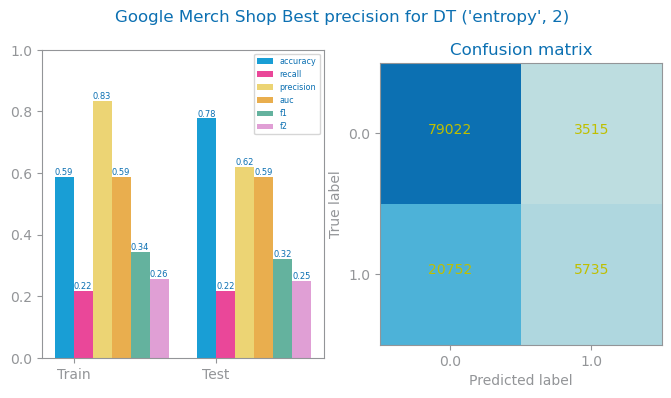

In [81]:
prd_trn: array = best_model_prec.predict(trnX)
prd_tst: array = best_model_prec.predict(tstX)
figure()
plot_evaluation_results(prec_params, trnY, prd_trn, tstY, prd_tst, labels, file_tag=file_tag)
savefig(f'images/{file_tag}_knn_{prec_params["name"]}_best_{prec_params["metric"]}_eval.png')
show()

# f2

## f2 study

 DT best with entropy and d=6


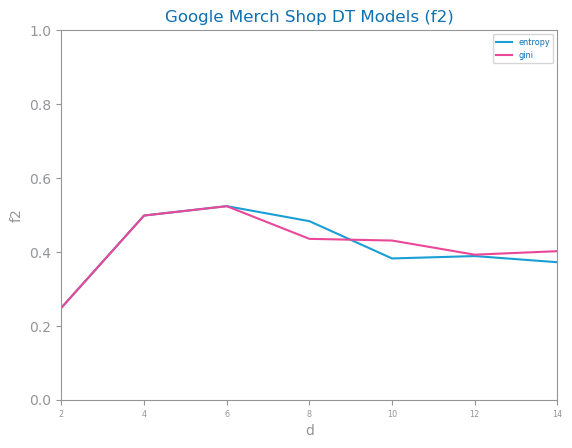

In [82]:
best_model_f2, f2_params = trees_study(trnX, trnY, tstX, tstY, d_max=d_max_eval, metric='f2', file_tag=file_tag)
savefig(f'images/{file_tag}_dt_{f2_params["metric"]}_study.png')
show()

## f2 best model

<Figure size 640x480 with 0 Axes>

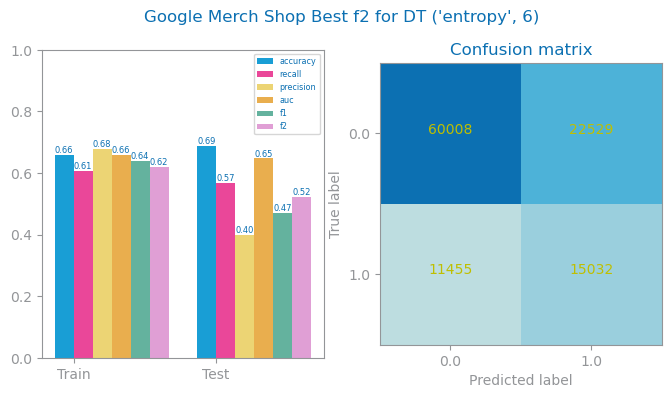

In [83]:
prd_trn: array = best_model_f2.predict(trnX)
prd_tst: array = best_model_f2.predict(tstX)
figure()
plot_evaluation_results(f2_params, trnY, prd_trn, tstY, prd_tst, labels, file_tag=file_tag)
savefig(f'images/{file_tag}_knn_{f2_params["name"]}_best_{f2_params["metric"]}_eval.png')
show()

# F2 Variables importance
IF YOU HAVE AN ERROR YOU MAY NEED TO INSTALL GRAPHVIZ
1. open conda terminal
2. conda install graphviz

## f2 tree evaluation

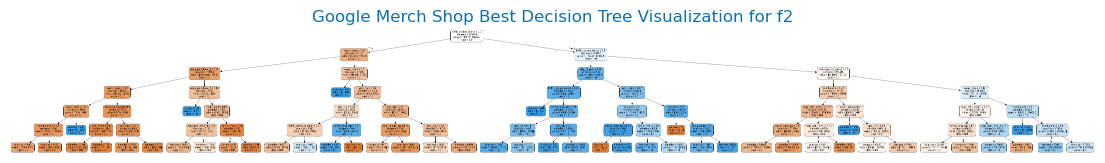

In [84]:
from sklearn.tree import export_graphviz
from matplotlib.pyplot import imread, imshow, axis, title
from subprocess import call

tree_filename: str = f"images/{file_tag}_dt_{f2_params['metric']}_best_tree"
max_depth2show = 8
st_labels: list[str] = [str(value) for value in labels]

dot_data: str = export_graphviz(
    best_model_f2,
    out_file=tree_filename + ".dot",
    max_depth=max_depth2show,
    feature_names=vars,
    class_names=st_labels,
    filled=True,
    rounded=True,
    impurity=False,
    special_characters=True,
    precision=2,
)
# Convert to png
call(
    ["dot", "-Tpng", tree_filename + ".dot", "-o", tree_filename + ".png", "-Gdpi=600"]
)

figure(figsize=(14, 6))
imshow(imread(tree_filename + ".png"))
title(f'{file_tag} Best Decision Tree Visualization for {f2_params['metric']}')
axis("off")
show()

## f2 simpler tree

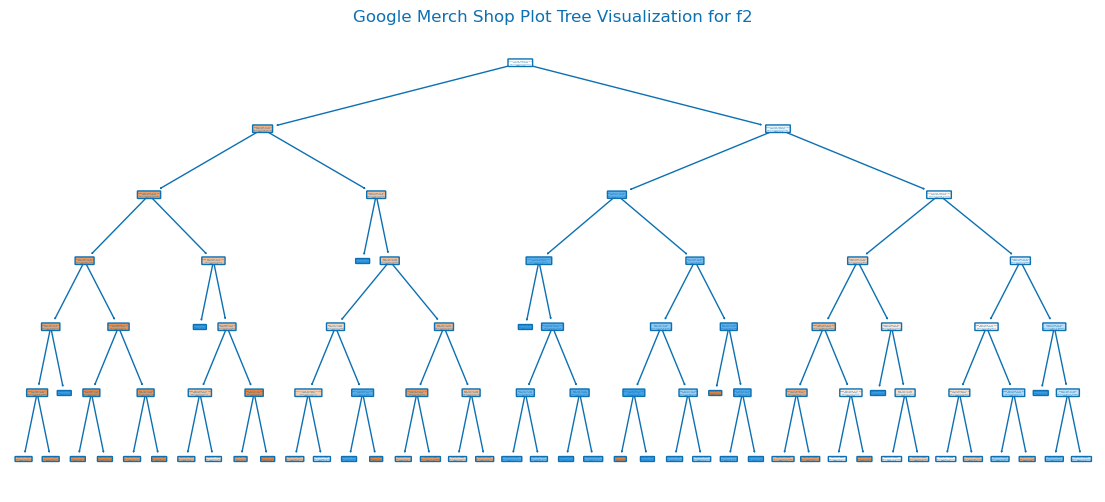

In [85]:
from sklearn.tree import plot_tree
from matplotlib.pyplot import title

figure(figsize=(14, 6))
plot_tree(
    best_model_f2,
    max_depth=max_depth2show,
    feature_names=vars,
    class_names=st_labels,
    filled=True,
    rounded=True,
    impurity=False,
    precision=2,
)
savefig(tree_filename + "_simple.png")
title(f'{file_tag} Plot Tree Visualization for {f2_params['metric']}')

show()

## f2 Feature Importances

1. traffic_source_source (0.6146524282224001)
2. event_name (0.21108973907216833)
3. page_path_level_1 (0.06718759718409036)
4. geo_city (0.052962236320703425)
5. device_language (0.03017158467148579)
6. day_of_year (0.007499894014371777)
7. traffic_source_medium (0.005841193257102583)
8. geo_region (0.0033301575531681626)
9. local_minute_sin (0.0025925030580958965)
10. path_length (0.0024112207412418517)
11. geo_country (0.0011897381378006525)
12. session_engaged (0.0010717077673710485)
13. is_weekend (0.0)
14. local_minute_cos (0.0)
15. engagement_time_msec (0.0)


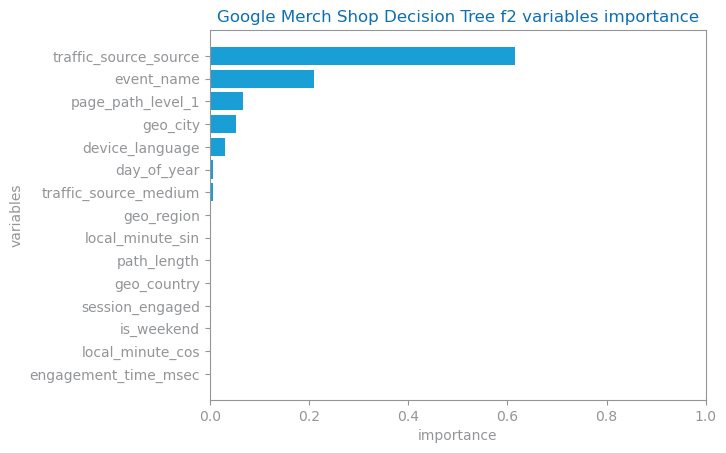

In [86]:
from numpy import argsort
from dslabs_functions import plot_horizontal_bar_chart

importances = best_model_f2.feature_importances_
indices: list[int] = argsort(importances)[::-1]
elems: list[str] = []
imp_values: list[float] = []
for f in range(len(vars)):
    elems += [vars[indices[f]]]
    imp_values += [importances[indices[f]]]
    print(f"{f+1}. {elems[f]} ({importances[indices[f]]})")

figure()
plot_horizontal_bar_chart(
    elems,
    imp_values,
    title=f"{file_tag} Decision Tree {f2_params['metric']} variables importance",
    xlabel="importance",
    ylabel="variables",
    percentage=True,
)
savefig(f"images/{file_tag}_dt_{f2_params['metric']}_vars_ranking.png")
show()

## f2 Overfitting

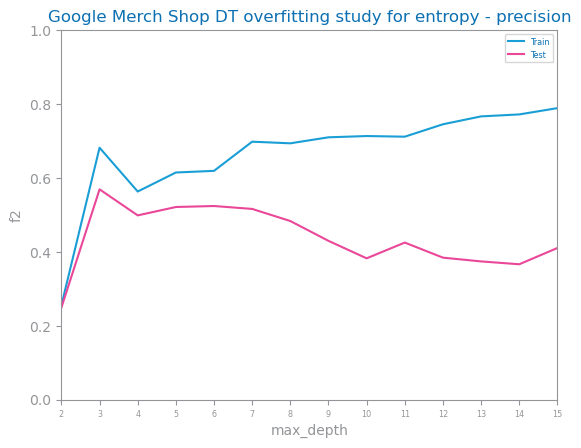

In [87]:
crit: Literal["entropy", "gini"] = f2_params["params"][0]
d_max = d_max_eval
depths: list[int] = [i for i in range(2, d_max + 1, 1)]
y_tst_values: list[float] = []
y_trn_values: list[float] = []
eval_metric = f2_params['metric']
for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, criterion=crit, min_impurity_decrease=0)
    clf.fit(trnX, trnY)
    prd_tst_Y: array = clf.predict(tstX)
    prd_trn_Y: array = clf.predict(trnX)
    y_tst_values.append(CLASS_EVAL_METRICS[eval_metric](tstY, prd_tst_Y))
    y_trn_values.append(CLASS_EVAL_METRICS[eval_metric](trnY, prd_trn_Y))

figure()
plot_multiline_chart(
    depths,
    {"Train": y_trn_values, "Test": y_tst_values},
    title=f"{file_tag} DT overfitting study for {crit} - {prec_params['metric']}",
    xlabel="max_depth",
    ylabel=str(f2_params['metric']),
    percentage=True,
)
savefig(f"images/{file_tag}_dt_{f2_params['metric']}_overfitting.png")

# Precision Variables Importance

## precision tree evaluation

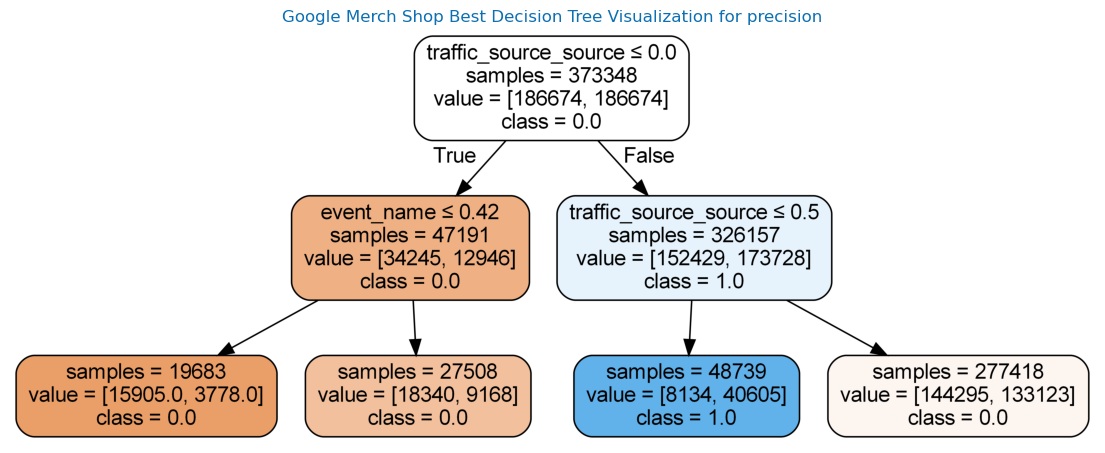

In [88]:
from sklearn.tree import export_graphviz
from matplotlib.pyplot import imread, imshow, axis, title
from subprocess import call

tree_filename: str = f"images/{file_tag}_dt_{prec_params['metric']}_best_tree"
max_depth2show = 8
st_labels: list[str] = [str(value) for value in labels]

dot_data: str = export_graphviz(
    best_model_prec,
    out_file=tree_filename + ".dot",
    max_depth=max_depth2show,
    feature_names=vars,
    class_names=st_labels,
    filled=True,
    rounded=True,
    impurity=False,
    special_characters=True,
    precision=2,
)
# Convert to png
call(
    ["dot", "-Tpng", tree_filename + ".dot", "-o", tree_filename + ".png", "-Gdpi=600"]
)

figure(figsize=(14, 6))
imshow(imread(tree_filename + ".png"))
title(f'{file_tag} Best Decision Tree Visualization for {prec_params['metric']}')
axis("off")
show()

## precision simple tree

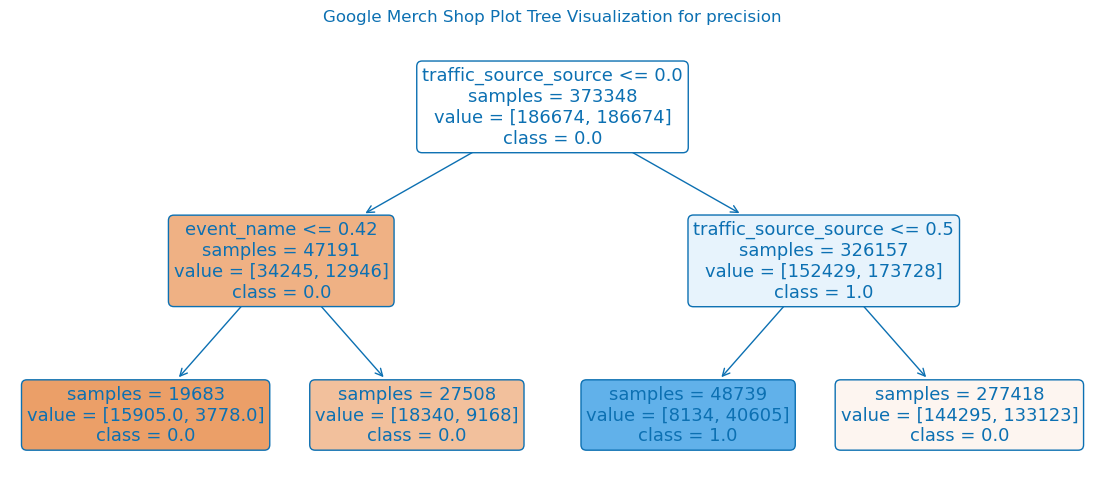

In [89]:
from sklearn.tree import plot_tree

figure(figsize=(14, 6))
plot_tree(
    best_model_prec,
    max_depth=max_depth2show,
    feature_names=vars,
    class_names=st_labels,
    filled=True,
    rounded=True,
    impurity=False,
    precision=2,
)
savefig(tree_filename + "_simple.png")
title(f'{file_tag} Plot Tree Visualization for {prec_params['metric']}')

show()

## precision feature importance

1. traffic_source_source (0.9663874291353857)
2. event_name (0.03361257086461434)
3. is_weekend (0.0)
4. session_engaged (0.0)
5. geo_country (0.0)
6. local_minute_cos (0.0)
7. local_minute_sin (0.0)
8. path_length (0.0)
9. page_path_level_1 (0.0)
10. day_of_year (0.0)
11. engagement_time_msec (0.0)
12. traffic_source_medium (0.0)
13. geo_city (0.0)
14. geo_region (0.0)
15. device_language (0.0)


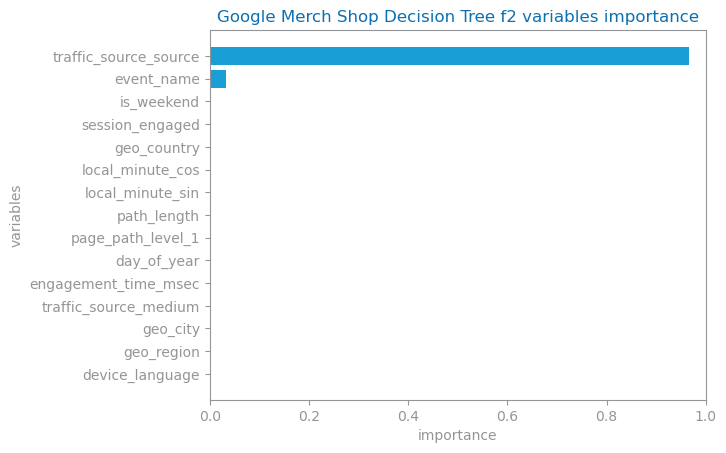

In [90]:
from numpy import argsort
from dslabs_functions import plot_horizontal_bar_chart

importances = best_model_prec.feature_importances_
indices: list[int] = argsort(importances)[::-1]
elems: list[str] = []
imp_values: list[float] = []
for f in range(len(vars)):
    elems += [vars[indices[f]]]
    imp_values += [importances[indices[f]]]
    print(f"{f+1}. {elems[f]} ({importances[indices[f]]})")

figure()
plot_horizontal_bar_chart(
    elems,
    imp_values,
    title=f"{file_tag} Decision Tree {f2_params['metric']} variables importance",
    xlabel="importance",
    ylabel="variables",
    percentage=True,
)
savefig(f"images/{file_tag}_dt_{prec_params['metric']}_vars_ranking.png")
show()

## precision overfitting

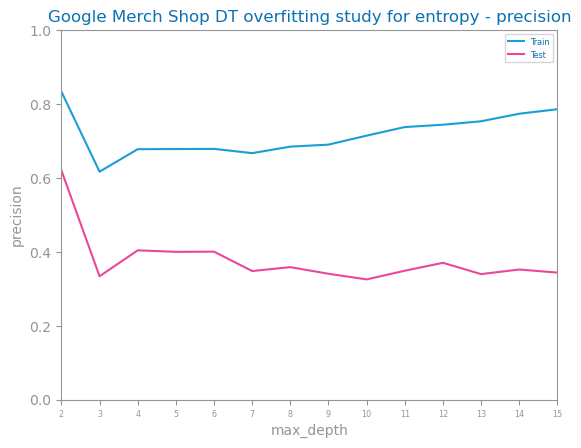

In [91]:
crit: Literal["entropy", "gini"] = prec_params["params"][0]
d_max = d_max_eval
depths: list[int] = [i for i in range(2, d_max + 1, 1)]
y_tst_values: list[float] = []
y_trn_values: list[float] = []
eval_metric = prec_params['metric']
for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, criterion=crit, min_impurity_decrease=0)
    clf.fit(trnX, trnY)
    prd_tst_Y: array = clf.predict(tstX)
    prd_trn_Y: array = clf.predict(trnX)
    y_tst_values.append(CLASS_EVAL_METRICS[eval_metric](tstY, prd_tst_Y))
    y_trn_values.append(CLASS_EVAL_METRICS[eval_metric](trnY, prd_trn_Y))

figure()
plot_multiline_chart(
    depths,
    {"Train": y_trn_values, "Test": y_tst_values},
    title=f"{file_tag} DT overfitting study for {crit} - {prec_params['metric']}",
    xlabel="max_depth",
    ylabel=str(prec_params['metric']),
    percentage=True,
)
savefig(f"images/{file_tag}_dt_{prec_params['metric']}_overfitting.png")

# Analysis

- F2 DT best with entropy and d=4 
- Precision DT best with entropy and d=2

- there is high overfitting

- with a focus on f2 we have the following top variables by importance

1. traffic_source_source (0.734834806538122)
2. event_name (0.13345302260356195)
3. traffic_source_medium (0.10659741612362471)
4. engagement_time_msec (0.007780857791340006)
5. page_path_level_1 (0.0073798023833999)
6. path_length (0.006371182221495404)
7. session_engaged (0.0035829123384559284)

traffic alone is the major single variable that can affect if a user is returning or not also on precision